In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (assuming it's in a CSV file)
file_path = r"C:\Users\94718\OneDrive\Desktop\NIBM\Principle of DS\ProtofolioIndi\GitCode1\PRINCIPLES-OF-DATA-SCIENCE-Portfolio\Data Acquisition\Data\supermarket_sales - Sheet1.csv"  # Change this to your actual file path
df = pd.read_csv(file_path)


Branch and Product Line Performance:
   Branch            Product line       Total  gross income    Rating  \
3       A       Health and beauty  12597.7530      599.8930  6.900000   
16      C      Home and lifestyle  13895.5530      661.6930  7.060000   
8       B      Food and beverages  15214.8885      724.5185  6.994000   
17      C       Sports and travel  15761.9280      750.5680  7.028889   
1       A     Fashion accessories  16332.5085      777.7385  6.878431   
7       B     Fashion accessories  16413.3165      781.5865  6.722581   
15      C       Health and beauty  16615.3260      791.2060  6.998077   
6       B  Electronic accessories  17051.4435      811.9735  7.116364   
2       A      Food and beverages  17163.1005      817.2905  7.253448   
10      B      Home and lifestyle  17549.1645      835.6745  6.516000   
0       A  Electronic accessories  18317.1135      872.2435  6.911667   
12      C  Electronic accessories  18968.9745      903.2845  6.747273   
5       A     

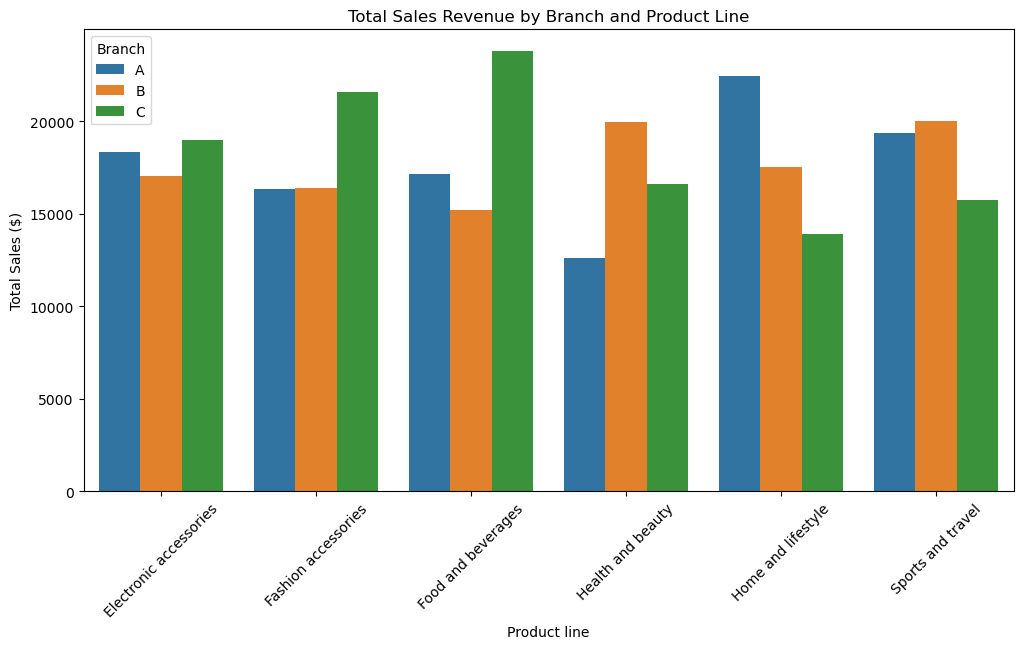

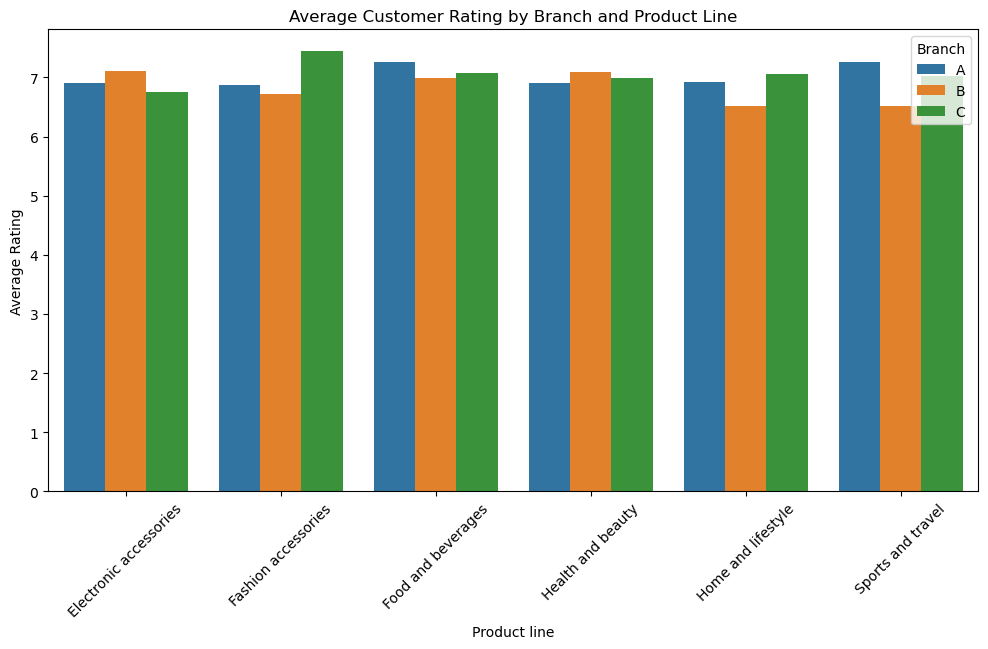


Sales by Customer Type:
  Branch Customer type       Total
0      A        Member  53637.4755
1      A        Normal  52562.8950
2      B        Member  53704.6860
3      B        Normal  52492.9860
4      C        Member  56881.2825
5      C        Normal  53687.4240

Sales by Payment Method:
  Branch      Payment       Total
0      A         Cash  33781.2510
1      A  Credit card  33094.7505
2      A      Ewallet  39324.3690
3      B         Cash  35339.4615
4      B  Credit card  37344.8565
5      B      Ewallet  33513.3540
6      C         Cash  43085.8575
7      C  Credit card  30327.4650
8      C      Ewallet  37155.3840


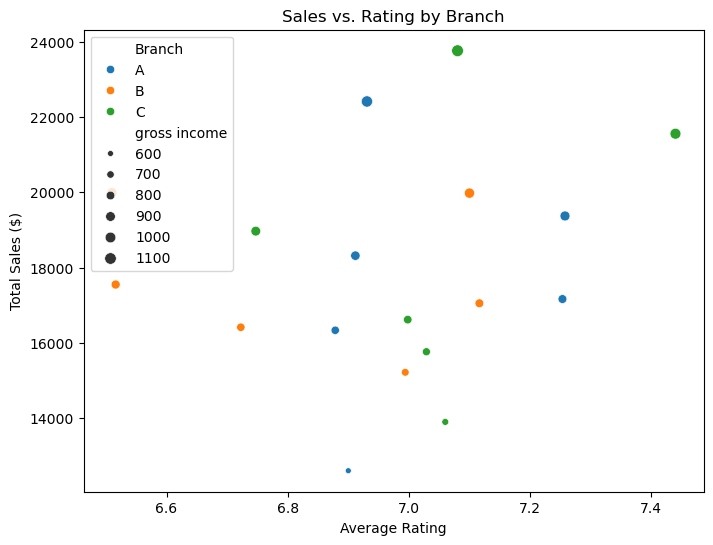

In [ ]:

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# 1. Aggregate total sales revenue and gross income by branch and product line
branch_product_agg = df.groupby(['Branch', 'Product line']).agg({
    'Total': 'sum',
    'gross income': 'sum',
    'Rating': 'mean',
    'Invoice ID': 'count'  # Number of transactions
}).rename(columns={'Invoice ID': 'Transaction Count'}).reset_index()

# 2. Identify underperformers (e.g., lowest total sales and gross income)
print("Branch and Product Line Performance:")
print(branch_product_agg.sort_values(by='Total'))

# 3. Visualize total sales by branch and product line
plt.figure(figsize=(12, 6))
sns.barplot(data=branch_product_agg, x='Product line', y='Total', hue='Branch')
plt.title('Total Sales Revenue by Branch and Product Line')
plt.xticks(rotation=45)
plt.ylabel('Total Sales ($)')
plt.show()

# 4. Visualize average rating by branch and product line
plt.figure(figsize=(12, 6))
sns.barplot(data=branch_product_agg, x='Product line', y='Rating', hue='Branch')
plt.title('Average Customer Rating by Branch and Product Line')
plt.xticks(rotation=45)
plt.ylabel('Average Rating')
plt.show()

# 5. Explore contributing factors (Customer type and Payment method)
customer_type_agg = df.groupby(['Branch', 'Customer type']).agg({'Total': 'sum'}).reset_index()
payment_method_agg = df.groupby(['Branch', 'Payment']).agg({'Total': 'sum'}).reset_index()

print("\nSales by Customer Type:")
print(customer_type_agg)
print("\nSales by Payment Method:")
print(payment_method_agg)

# 6. Correlation between rating and sales
plt.figure(figsize=(8, 6))
sns.scatterplot(data=branch_product_agg, x='Rating', y='Total', hue='Branch', size='gross income')
plt.title('Sales vs. Rating by Branch')
plt.xlabel('Average Rating')
plt.ylabel('Total Sales ($)')
plt.show()

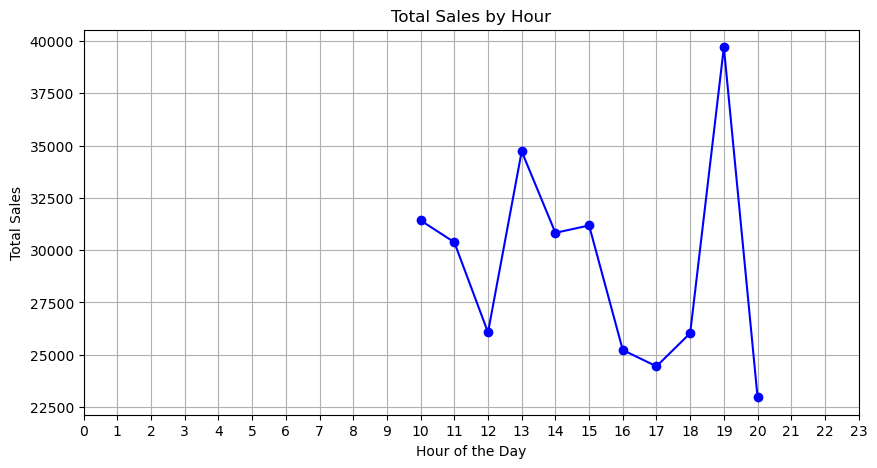

Peak Sales Hour: 19:00 with total sales of 39699.51
Lowest Sales Hour: 20:00 with total sales of 22969.53


In [4]:

# Load the dataset
# Load dataset (assuming it's in a CSV file)
file_path = r"C:\Users\94718\OneDrive\Desktop\NIBM\Principle of DS\ProtofolioIndi\GitCode1\PRINCIPLES-OF-DATA-SCIENCE-Portfolio\Data Acquisition\Data\supermarket_sales - Sheet1.csv"  # Change this to your actual file path
df = pd.read_csv(file_path)


# Convert 'Time' column to datetime format
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.hour

# Group by hour and calculate total sales
hourly_sales = df.groupby('Time')['Total'].sum()

# Plot sales trends over the hours
plt.figure(figsize=(10, 5))
plt.plot(hourly_sales.index, hourly_sales.values, marker='o', linestyle='-', color='b')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')
plt.title('Total Sales by Hour')
plt.xticks(range(0, 24))
plt.grid()
plt.show()

# Identifying peak hours
peak_hours = hourly_sales.idxmax()
low_hours = hourly_sales.idxmin()

print(f"Peak Sales Hour: {peak_hours}:00 with total sales of {hourly_sales.max():.2f}")
print(f"Lowest Sales Hour: {low_hours}:00 with total sales of {hourly_sales.min():.2f}")

# Proposed Solution:
# - Increase staffing during peak hours to improve customer service.
# - Ensure high-demand inventory is stocked before peak hours.
# - Plan promotions during low sales hours to boost sales.
